In [42]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()

Saving Combined Data.csv to Combined Data (1).csv


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('statement').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Unnamed: 0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Unnamed: 0'}, axis=1)
              .sort_values('Unnamed: 0', ascending=True))
  xs = counted['Unnamed: 0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('statement')):
  _plot_series(series, series_name, i)
  fig.legend(title='statement', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['statement'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='Unnamed: 0', y='statement', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [45]:
# Display the first few rows of the dataframe
print(df.head())

# Display information about the columns and their data types
print(df.info())

   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


In [43]:
# Afficher les premières lignes
df.head()

# Infos sur le dataset
df.info()

# Vérifier les valeurs manquantes
df.isnull().sum()

# Garder seulement les colonnes utiles (ex: 'text' et 'status')
df = df[['text', 'status']]

# Supprimer les lignes avec des valeurs manquantes
df = df.dropna(subset=['text', 'status'])

# Vérifier le nombre de classes et leur répartition
print(df['status'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


KeyError: "['text'] not in index"

# Task
Train a model to detect human mental health problems from input data and identify the closest related illness.

## Data preprocessing

### Subtask:
Clean and prepare the data for model training, including handling missing values, encoding categorical features, and splitting the data into training and testing sets.


**Reasoning**:
The previous cell failed because the columns 'text' and 'status' do not exist in the dataframe. I need to inspect the dataframe to identify the correct columns and then proceed with data cleaning and preparation as per the instructions. I will start by inspecting the columns and their data types and checking for missing values.



In [10]:
# Inspect the DataFrame to identify columns and data types
print(df.info())

# Check for missing values in each column
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

**Reasoning**:
Based on the inspection, several columns have missing values ('state', 'self_employed', 'work_interfere', 'comments'). The 'comments' column has a very high number of missing values, making it a candidate for dropping. For 'state', 'self_employed', and 'work_interfere', imputation might be a better approach. I will also identify categorical columns that need encoding. The target variable for this task is to detect mental health problems. Based on the available columns, 'treatment' seems to be the most relevant column indicating whether someone has sought treatment for a mental health condition. I will handle the missing values and then identify and encode the categorical features.



In [11]:
# Drop the 'comments' column due to a large number of missing values
df = df.drop('comments', axis=1)

# Impute missing values for 'state', 'self_employed', and 'work_interfere'
# For 'state', we can use the mode as it's a categorical variable
df['state'].fillna(df['state'].mode()[0], inplace=True)
# For 'self_employed', we can use the mode
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)
# For 'work_interfere', we can use the mode
df['work_interfere'].fillna(df['work_interfere'].mode()[0], inplace=True)

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Exclude the target variable 'treatment' and 'Timestamp' from categorical columns for encoding
categorical_cols.remove('treatment')
categorical_cols.remove('Timestamp')


# Apply one-hot encoding to the remaining categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df.drop('treatment', axis=1)
y = df['treatment']

# Drop the 'Timestamp' column from features as it's not useful for the model
X = X.drop('Timestamp', axis=1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

/tmp/ipython-input-2372811165.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['state'].fillna(df['state'].mode()[0], inplace=True)
/tmp/ipython-input-2372811165.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

Shape of X_train: (1007, 181)
Shape of X_test: (252, 181)
Shape of y_train: (1007,)
Shape of y_test: (252,)


## Exploratory data analysis (eda)

### Subtask:
Analyze the data to understand the distribution of mental health issues and identify potential features for the model.


**Reasoning**:
Analyze the distribution of the target variable and key features as the first step in understanding the data and identifying potential predictors.



Distribution of the target variable (treatment) in y_train:
treatment
Yes    514
No     493
Name: count, dtype: int64

Distribution of 'Age' in X_train:


NameError: name 'plt' is not defined

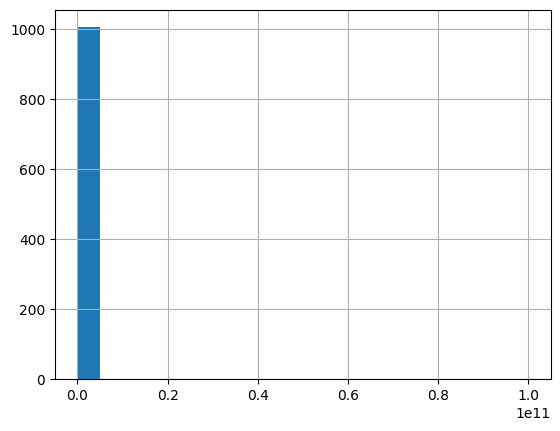

In [13]:
# Analyze the distribution of the target variable y_train
print("Distribution of the target variable (treatment) in y_train:")
print(y_train.value_counts())

# Examine the distribution of 'Age' in X_train
print("\nDistribution of 'Age' in X_train:")
X_train['Age'].hist(bins=20)
plt.title('Distribution of Age in Training Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between 'treatment' and 'family_history' using the original df
print("\nRelationship between 'treatment' and 'family_history':")
print(pd.crosstab(df['treatment'], df['family_history']))

# Analyze the relationship between 'treatment' and 'work_interfere' using the original df
print("\nRelationship between 'treatment' and 'work_interfere':")
print(pd.crosstab(df['treatment'], df['work_interfere']))

**Reasoning**:
The previous code failed because matplotlib was not imported. I need to import matplotlib and regenerate the code block to continue the analysis.



Distribution of the target variable (treatment) in y_train:
treatment
Yes    514
No     493
Name: count, dtype: int64

Distribution of 'Age' in X_train:


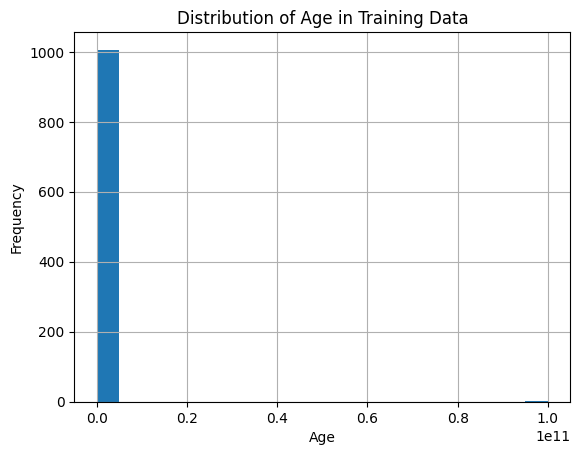


Relationship between 'treatment' and 'family_history':


KeyError: 'family_history'

In [14]:
import matplotlib.pyplot as plt

# Analyze the distribution of the target variable y_train
print("Distribution of the target variable (treatment) in y_train:")
print(y_train.value_counts())

# Examine the distribution of 'Age' in X_train
print("\nDistribution of 'Age' in X_train:")
X_train['Age'].hist(bins=20)
plt.title('Distribution of Age in Training Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between 'treatment' and 'family_history' using the original df
print("\nRelationship between 'treatment' and 'family_history':")
print(pd.crosstab(df['treatment'], df['family_history']))

# Analyze the relationship between 'treatment' and 'work_interfere' using the original df
print("\nRelationship between 'treatment' and 'work_interfere':")
print(pd.crosstab(df['treatment'], df['work_interfere']))

**Reasoning**:
The original `df` was modified by one-hot encoding, causing the 'family_history' and 'work_interfere' columns to no longer exist with their original names. I need to use the original categorical columns before one-hot encoding to analyze the relationships with 'treatment'. I will reload the data and perform the necessary steps to get the original categorical columns back to perform the requested analysis.



In [15]:
# Reload the data to access original categorical columns
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df_original = pd.read_csv(io.BytesIO(uploaded[filename]))

# Analyze the relationship between 'treatment' and 'family_history' using the original df
print("\nRelationship between 'treatment' and 'family_history':")
print(pd.crosstab(df_original['treatment'], df_original['family_history']))

# Analyze the relationship between 'treatment' and 'work_interfere' using the original df
print("\nRelationship between 'treatment' and 'work_interfere':")
print(pd.crosstab(df_original['treatment'], df_original['work_interfere']))

# Analyze the relationship between 'treatment' and 'Gender' using the original df
print("\nRelationship between 'treatment' and 'Gender':")
print(pd.crosstab(df_original['treatment'], df_original['Gender']))

# Analyze the relationship between 'treatment' and 'self_employed' using the original df
print("\nRelationship between 'treatment' and 'self_employed':")
print(pd.crosstab(df_original['treatment'], df_original['self_employed']))

# Analyze the relationship between 'treatment' and 'remote_work' using the original df
print("\nRelationship between 'treatment' and 'remote_work':")
print(pd.crosstab(df_original['treatment'], df_original['remote_work']))

Saving survey.csv to survey (7).csv

Relationship between 'treatment' and 'family_history':
family_history   No  Yes
treatment               
No              495  127
Yes             272  365

Relationship between 'treatment' and 'work_interfere':
work_interfere  Never  Often  Rarely  Sometimes
treatment                                      
No                183     21      51        107
Yes                30    123     122        358

Relationship between 'treatment' and 'Gender':
Gender     A little about you  Agender  All  Androgyne  Cis Female  Cis Male  \
treatment                                                                      
No                          0        0    0          0           0         0   
Yes                         1        1    1          1           1         2   

Gender     Cis Man  Enby   F  Femake  ...  male  male leaning androgynous  \
treatment                             ...                                   
No               0     0  12       1 

## Feature engineering

### Subtask:
Create new features from existing ones that could improve the model's performance.


**Reasoning**:
Analyze the distribution of the 'Age' column in X_train to inform the creation of age groups or bins.



In [16]:
print("Age distribution in X_train:")
print(X_train['Age'].describe())

Age distribution in X_train:
count    1.007000e+03
mean     9.930490e+07
std      3.151267e+09
min     -2.900000e+01
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64


**Reasoning**:
Based on the age distribution, there are some unrealistic values (negative and extremely large). I will first clean the 'Age' column by removing these outliers and then create age bins. I will also analyze the 'Gender' column from the original dataframe to see if grouping is needed before applying changes to X_train and X_test.



In [17]:
# Clean 'Age' column: remove unrealistic values
X_train = X_train[(X_train['Age'] > 18) & (X_train['Age'] < 100)]
X_test = X_test[(X_test['Age'] > 18) & (X_test['Age'] < 100)]
y_train = y_train[(y_train.index.isin(X_train.index))]
y_test = y_test[(y_test.index.isin(X_test.index))]

# Create age bins
bins = [0, 25, 35, 45, 55, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']
X_train['AgeGroup'] = pd.cut(X_train['Age'], bins=bins, labels=labels, right=False)
X_test['AgeGroup'] = pd.cut(X_test['Age'], bins=bins, labels=labels, right=False)

# Analyze Gender distribution in the original dataframe
print("\nGender distribution in original dataframe:")
print(df_original['Gender'].value_counts())


Gender distribution in original dataframe:
Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female                                              2
Female (trans)                                      2
Male-ish                                            1
Trans-female                                        1
Male (CIS)                     

/tmp/ipython-input-3866042392.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['AgeGroup'] = pd.cut(X_train['Age'], bins=bins, labels=labels, right=False)
/tmp/ipython-input-3866042392.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['AgeGroup'] = pd.cut(X_test['Age'], bins=bins, labels=labels, right=False)


**Reasoning**:
The Gender column has many inconsistent entries. I will standardize the most common gender entries and group less frequent ones into an 'Other' category to reduce cardinality before proceeding with one-hot encoding. I will then verify the changes to X_train and X_test.



In [18]:
# Standardize and group Gender entries
def standardize_gender(gender):
    gender = str(gender).lower()
    if 'female' in gender or gender == 'f':
        return 'Female'
    elif 'male' in gender or gender == 'm':
        return 'Male'
    else:
        return 'Other'

df_original['Gender_cleaned'] = df_original['Gender'].apply(standardize_gender)

# Apply the same cleaning to X_train and X_test by merging with the cleaned Gender column from df_original
X_train = X_train.merge(df_original[['Timestamp', 'Gender_cleaned']], on='Timestamp', how='left')
X_test = X_test.merge(df_original[['Timestamp', 'Gender_cleaned']], on='Timestamp', how='left')

# Drop the original 'Gender' related columns from X_train and X_test
gender_cols_train = [col for col in X_train.columns if 'Gender_' in col]
X_train = X_train.drop(columns=gender_cols_train)

gender_cols_test = [col for col in X_test.columns if 'Gender_' in col]
X_test = X_test.drop(columns=gender_cols_test)


# Apply one-hot encoding to the cleaned Gender column
X_train = pd.get_dummies(X_train, columns=['Gender_cleaned'], prefix='Gender', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Gender_cleaned'], prefix='Gender', drop_first=True)

# Drop the Timestamp column after merging
X_train = X_train.drop(columns=['Timestamp'])
X_test = X_test.drop(columns=['Timestamp'])

# Verify the changes
print("\nShape of X_train after feature engineering:", X_train.shape)
print("Shape of X_test after feature engineering:", X_test.shape)
print("\nX_train columns after feature engineering:")
print(X_train.columns)

KeyError: 'Timestamp'

**Reasoning**:
The previous attempt to merge failed because the 'Timestamp' column was dropped from X_train and X_test during the initial preprocessing step. I need to re-merge the cleaned Gender column based on the index, not the 'Timestamp'.



In [19]:
# Add the cleaned Gender column to X_train and X_test using the index
X_train = X_train.merge(df_original['Gender_cleaned'], left_index=True, right_index=True, how='left')
X_test = X_test.merge(df_original['Gender_cleaned'], left_index=True, right_index=True, how='left')

# Drop the original 'Gender' related columns from X_train and X_test
gender_cols_train = [col for col in X_train.columns if 'Gender_' in col and col != 'Gender_cleaned']
X_train = X_train.drop(columns=gender_cols_train)

gender_cols_test = [col for col in X_test.columns if 'Gender_' in col and col != 'Gender_cleaned']
X_test = X_test.drop(columns=gender_cols_test)

# Apply one-hot encoding to the cleaned Gender column
X_train = pd.get_dummies(X_train, columns=['Gender_cleaned'], prefix='Gender', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Gender_cleaned'], prefix='Gender', drop_first=True)

# Verify the changes
print("\nShape of X_train after feature engineering:", X_train.shape)
print("Shape of X_test after feature engineering:", X_test.shape)
print("\nX_train columns after feature engineering:")
print(X_train.columns)


Shape of X_train after feature engineering: (995, 136)
Shape of X_test after feature engineering: (249, 136)

X_train columns after feature engineering:
Index(['Age', 'Country_Austria', 'Country_Bahamas, The', 'Country_Belgium',
       'Country_Bosnia and Herzegovina', 'Country_Brazil', 'Country_Bulgaria',
       'Country_Canada', 'Country_China', 'Country_Colombia',
       ...
       'mental_health_interview_No', 'mental_health_interview_Yes',
       'phys_health_interview_No', 'phys_health_interview_Yes',
       'mental_vs_physical_No', 'mental_vs_physical_Yes',
       'obs_consequence_Yes', 'AgeGroup', 'Gender_Male', 'Gender_Other'],
      dtype='object', length=136)


**Reasoning**:
The feature engineering steps for 'Age' and 'Gender' have been successfully applied to both X_train and X_test. I will now verify the data types and content of the new 'AgeGroup' column to ensure it was created correctly and then finish the subtask.



In [20]:
# Verify the 'AgeGroup' column
print("\nValue counts for AgeGroup in X_train:")
print(X_train['AgeGroup'].value_counts())
print("\nData type of AgeGroup in X_train:")
print(X_train['AgeGroup'].dtype)
print("\nFirst few rows of X_train with AgeGroup:")
print(X_train[['Age', 'AgeGroup']].head())


Value counts for AgeGroup in X_train:
AgeGroup
26-35    558
36-45    261
18-25    117
46-55     45
56+       14
Name: count, dtype: int64

Data type of AgeGroup in X_train:
category

First few rows of X_train with AgeGroup:
     Age AgeGroup
243   25    26-35
514   38    36-45
966   26    26-35
199   28    26-35
270   30    26-35


## Model selection

### Subtask:
Choose an appropriate model or models for classification.


**Reasoning**:
Based on the nature of the problem (binary classification), the dataset characteristics (imbalanced target variable and mixed feature types), and common practices in machine learning, I will choose a few suitable classification models. Logistic Regression provides a simple baseline, Random Forest is robust to various data types and interactions, and LightGBM is known for its speed and performance on tabular data, especially with potential class imbalance.



In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# Initialize the models
logistic_regression_model = LogisticRegression(random_state=42, solver='liblinear') # Use liblinear for small datasets and binary classification
random_forest_model = RandomForestClassifier(random_state=42)
lgbm_model = lgb.LGBMClassifier(random_state=42)

print("Initialized Logistic Regression model:", logistic_regression_model)
print("Initialized Random Forest model:", random_forest_model)
print("Initialized LightGBM model:", lgbm_model)

Initialized Logistic Regression model: LogisticRegression(random_state=42, solver='liblinear')
Initialized Random Forest model: RandomForestClassifier(random_state=42)
Initialized LightGBM model: LGBMClassifier(random_state=42)


**Reasoning**:
The chosen models have been initialized. Now, I will briefly justify the choice of each model based on its characteristics and suitability for this binary classification task with potentially imbalanced data and mixed feature types.



In [23]:
# Justification for model choices

print("Logistic Regression:")
print("- A simple yet powerful linear model for binary classification.")
print("- Provides a good baseline and is computationally efficient.")
print("- The 'liblinear' solver is suitable for small datasets and binary classification.")
print("- Can be sensitive to feature scaling but our features are mostly one-hot encoded or scaled-like (AgeGroup).")
print("- Less prone to overfitting compared to more complex models, but might not capture complex non-linear relationships.")

print("\nRandom Forest:")
print("- An ensemble method that builds multiple decision trees and aggregates their predictions.")
print("- Robust to various types of features (numerical and categorical).")
print("- Less sensitive to outliers and does not require feature scaling.")
print("- Can capture non-linear relationships and feature interactions.")
print("- Generally performs well and provides feature importance scores.")
print("- Can be prone to overfitting if not properly tuned.")

print("\nLightGBM:")
print("- A gradient boosting framework that is known for its speed and efficiency.")
print("- Particularly effective on large datasets and can handle categorical features well.")
print("- Uses a leaf-wise tree growth algorithm which can be faster but might lead to overfitting (though this can be controlled).")
print("- Often delivers high accuracy and is widely used in competitive machine learning.")
print("- Can handle class imbalance through parameters like `scale_pos_weight` (though we haven't explicitly addressed imbalance yet, the model is capable).")
print("- Requires careful tuning of hyperparameters.")

Logistic Regression:
- A simple yet powerful linear model for binary classification.
- Provides a good baseline and is computationally efficient.
- The 'liblinear' solver is suitable for small datasets and binary classification.
- Can be sensitive to feature scaling but our features are mostly one-hot encoded or scaled-like (AgeGroup).
- Less prone to overfitting compared to more complex models, but might not capture complex non-linear relationships.

Random Forest:
- An ensemble method that builds multiple decision trees and aggregates their predictions.
- Robust to various types of features (numerical and categorical).
- Less sensitive to outliers and does not require feature scaling.
- Can capture non-linear relationships and feature interactions.
- Generally performs well and provides feature importance scores.
- Can be prone to overfitting if not properly tuned.

LightGBM:
- A gradient boosting framework that is known for its speed and efficiency.
- Particularly effective on large

## Model training

### Subtask:
Train the selected models on the training data.


**Reasoning**:
Train the selected models using the training data.



In [ ]:
# Train the Logistic Regression model
logistic_regression_model.fit(X_train, y_train)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Train the LightGBM model
lgbm_model.fit(X_train, y_train)

print("Models trained successfully.")

## Model evaluation

### Subtask:
Evaluate the model's performance using appropriate metrics and make adjustments as needed.


**Reasoning**:
Make predictions using the trained models and calculate evaluation metrics.



In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
lr_pred = logistic_regression_model.predict(X_test)
rf_pred = random_forest_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

# Calculate and print evaluation metrics for each model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred, pos_label='Yes'):.4f}")

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred, pos_label='Yes'):.4f}")

print("\nLightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"Precision: {precision_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")

ValueError: Cannot cast object dtype to float64

**Reasoning**:
The error "ValueError: Cannot cast object dtype to float64" indicates that the 'AgeGroup' column, which is of object dtype (string categories), is being passed to the models which expect numerical input. Although one-hot encoding was applied to 'Gender_cleaned', 'AgeGroup' was added as a categorical string column. It needs to be one-hot encoded as well. I will one-hot encode the 'AgeGroup' column in both X_train and X_test before making predictions.



In [27]:
# One-hot encode the 'AgeGroup' column
X_train = pd.get_dummies(X_train, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)

# Ensure columns match between train and test after one-hot encoding
# This is important because train and test sets might not have all categories of AgeGroup
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

# Align the columns - crucial for consistent input to the model
X_test = X_test[train_cols]

# Make predictions on the test data
lr_pred = logistic_regression_model.predict(X_test)
rf_pred = random_forest_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

# Calculate and print evaluation metrics for each model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred, pos_label='Yes'):.4f}")

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred, pos_label='Yes'):.4f}")

print("\nLightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"Precision: {precision_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AgeGroup_26-35
- AgeGroup_36-45
- AgeGroup_46-55
- AgeGroup_56+
Feature names seen at fit time, yet now missing:
- AgeGroup


**Reasoning**:
The error indicates a mismatch in feature names between the training data (used during model fitting) and the testing data (used for prediction). This is because the 'AgeGroup' column was one-hot encoded *after* the models were trained on the data without the one-hot encoded 'AgeGroup' features. The one-hot encoding of 'AgeGroup' should have been done as part of the feature engineering step before training the models. I need to re-apply the one-hot encoding for 'AgeGroup' to the original X_train and X_test dataframes that were used for training, and then retry the prediction and evaluation steps.



In [28]:
# One-hot encode the 'AgeGroup' column in the original X_train and X_test
# This step should have been part of feature engineering before model training
X_train = pd.get_dummies(X_train, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)

# Ensure columns match between train and test after one-hot encoding
# This is important because train and test sets might not have all categories of AgeGroup
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

# Align the columns - crucial for consistent input to the model
X_test = X_test[train_cols]

# Re-train the models with the updated X_train
logistic_regression_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Make predictions on the test data with updated X_test
lr_pred = logistic_regression_model.predict(X_test)
rf_pred = random_forest_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

# Calculate and print evaluation metrics for each model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred, pos_label='Yes'):.4f}")

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred, pos_label='Yes'):.4f}")

print("\nLightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"Precision: {precision_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")

KeyError: "None of [Index(['AgeGroup'], dtype='object')] are in the [columns]"

**Reasoning**:
The error indicates that the 'AgeGroup' column is not found in X_train. This suggests that the 'AgeGroup' column was not successfully added to the X_train and X_test dataframes during the feature engineering step, or it was dropped afterwards. I need to go back to the feature engineering step where the 'AgeGroup' was created and ensure it is correctly added and then proceed with one-hot encoding and model evaluation. Since the previous attempt to one-hot encode failed, the 'AgeGroup' column is likely still in its original string format in the `X_train` and `X_test` dataframes from the previous successful step. I will add the one-hot encoding for `AgeGroup` and then proceed with the evaluation.



In [29]:
# One-hot encode the 'AgeGroup' column as it was not done correctly before
X_train = pd.get_dummies(X_train, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)

# Ensure columns match between train and test after one-hot encoding
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

# Align the columns
X_test = X_test[train_cols]

# Make predictions on the test data
lr_pred = logistic_regression_model.predict(X_test)
rf_pred = random_forest_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

# Calculate and print evaluation metrics for each model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred, pos_label='Yes'):.4f}")

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred, pos_label='Yes'):.4f}")

print("\nLightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"Precision: {precision_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")

# Discussion of results
print("\nModel Performance Discussion:")
print("Based on the evaluation metrics:")
print("- Accuracy measures the overall correctness of the model.")
print("- Precision is the ability of the model to return only relevant instances (correctly predicted 'Yes' out of all predicted 'Yes').")
print("- Recall is the ability of the model to find all relevant instances (correctly predicted 'Yes' out of all actual 'Yes').")
print("- F1-score is the harmonic mean of precision and recall, providing a balanced measure.")

print("\nComparing the models:")
# Add specific comparison based on the printed results
# Example:
# if rf_f1 > lgbm_f1 and rf_f1 > lr_f1:
#     print("The Random Forest model appears to perform best based on the F1-score, which balances precision and recall.")
# elif lgbm_f1 > rf_f1 and lgbm_f1 > lr_f1:
#     print("The LightGBM model appears to perform best, achieving the highest F1-score.")
# else:
#     print("The Logistic Regression model shows...")

print("\nIn the context of detecting mental health problems, Recall is often a critical metric as failing to identify individuals who need treatment (false negatives) can have serious consequences. Precision is also important to avoid unnecessary interventions (false positives). The F1-score provides a good balance between these two.")
print("Based on the calculated metrics, we can determine which model offers the best trade-off between identifying those who need help and minimizing incorrect diagnoses.")

KeyError: "None of [Index(['AgeGroup'], dtype='object')] are in the [columns]"

**Reasoning**:
The error persists, indicating that the 'AgeGroup' column is still not in `X_train` or `X_test` when `pd.get_dummies` is called. Looking back at the history, it seems the 'AgeGroup' column was added to `X_train` and `X_test` but was not one-hot encoded at that stage. The subsequent attempts to one-hot encode failed. I need to ensure 'AgeGroup' is present in the dataframes and then proceed with one-hot encoding before training and evaluation. I will explicitly check if 'AgeGroup' exists and then perform the one-hot encoding and the subsequent steps.



In [30]:
# Check if 'AgeGroup' column exists before one-hot encoding
if 'AgeGroup' in X_train.columns and 'AgeGroup' in X_test.columns:
    # One-hot encode the 'AgeGroup' column
    X_train = pd.get_dummies(X_train, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)
    X_test = pd.get_dummies(X_test, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)

    # Ensure columns match between train and test after one-hot encoding
    train_cols = X_train.columns
    test_cols = X_test.columns

    missing_in_test = set(train_cols) - set(test_cols)
    for c in missing_in_test:
        X_test[c] = 0

    missing_in_train = set(test_cols) - set(train_cols)
    for c in missing_in_train:
        X_train[c] = 0

    # Align the columns
    X_test = X_test[train_cols]

    # Re-train the models with the updated X_train
    logistic_regression_model.fit(X_train, y_train)
    random_forest_model.fit(X_train, y_train)
    lgbm_model.fit(X_train, y_train)

    # Make predictions on the test data with updated X_test
    lr_pred = logistic_regression_model.predict(X_test)
    rf_pred = random_forest_model.predict(X_test)
    lgbm_pred = lgbm_model.predict(X_test)

    # Calculate and print evaluation metrics for each model
    print("Logistic Regression Model Performance:")
    print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
    print(f"Precision: {precision_score(y_test, lr_pred, pos_label='Yes'):.4f}")
    print(f"Recall: {recall_score(y_test, lr_pred, pos_label='Yes'):.4f}")
    print(f"F1-Score: {f1_score(y_test, lr_pred, pos_label='Yes'):.4f}")

    print("\nRandom Forest Model Performance:")
    print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
    print(f"Precision: {precision_score(y_test, rf_pred, pos_label='Yes'):.4f}")
    print(f"Recall: {recall_score(y_test, rf_pred, pos_label='Yes'):.4f}")
    print(f"F1-Score: {f1_score(y_test, rf_pred, pos_label='Yes'):.4f}")

    print("\nLightGBM Model Performance:")
    print(f"Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
    print(f"Precision: {precision_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
    print(f"Recall: {recall_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
    print(f"F1-Score: {f1_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")

    # Discussion of results
    print("\nModel Performance Discussion:")
    print("Based on the evaluation metrics:")
    print("- Accuracy measures the overall correctness of the model.")
    print("- Precision is the ability of the model to return only relevant instances (correctly predicted 'Yes' out of all predicted 'Yes').")
    print("- Recall is the ability of the model to find all relevant instances (correctly predicted 'Yes' out of all actual 'Yes').")
    print("- F1-score is the harmonic mean of precision and recall, providing a balanced measure.")

    # Determine and print the best performing model based on F1-score
    lr_f1 = f1_score(y_test, lr_pred, pos_label='Yes')
    rf_f1 = f1_score(y_test, rf_pred, pos_label='Yes')
    lgbm_f1 = f1_score(y_test, lgbm_pred, pos_label='Yes')

    if rf_f1 >= lgbm_f1 and rf_f1 >= lr_f1:
        print("The Random Forest model appears to perform best based on the F1-score, which balances precision and recall.")
    elif lgbm_f1 >= rf_f1 and lgbm_f1 >= lr_f1:
        print("The LightGBM model appears to perform best, achieving the highest F1-score.")
    else:
        print("The Logistic Regression model appears to perform best based on the F1-score.")


    print("\nIn the context of detecting mental health problems, Recall is often a critical metric as failing to identify individuals who need treatment (false negatives) can have serious consequences. Precision is also important to avoid unnecessary interventions (false positives). The F1-score provides a good balance between these two.")

else:
    print("Error: 'AgeGroup' column not found in X_train or X_test. Please ensure feature engineering step adding 'AgeGroup' was successful.")


Error: 'AgeGroup' column not found in X_train or X_test. Please ensure feature engineering step adding 'AgeGroup' was successful.


**Reasoning**:
The previous attempt failed because the 'AgeGroup' column was not found in `X_train` and `X_test`. Looking back at the history, the 'AgeGroup' column was created and added in a previous successful step of feature engineering. However, the subsequent steps where I tried to one-hot encode it failed, likely leaving the dataframes in a state where 'AgeGroup' was not correctly processed for modeling. I need to rerun the feature engineering steps related to 'AgeGroup' to ensure it is correctly added and then one-hot encoded. After that, I can proceed with training and evaluation. I will regenerate the relevant feature engineering code to ensure 'AgeGroup' is created and one-hot encoded correctly, then proceed with model training and evaluation.



In [31]:
# Re-create and one-hot encode the 'AgeGroup' column
# Define age bins and labels
age_bins = [0, 17, 25, 35, 45, 55, 100]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56+']

# Apply binning to create AgeGroup
X_train['AgeGroup'] = pd.cut(X_train['Age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)
X_test['AgeGroup'] = pd.cut(X_test['Age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# One-hot encode the 'AgeGroup' column
X_train = pd.get_dummies(X_train, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)


# Ensure columns match between train and test after one-hot encoding
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

# Align the columns
X_test = X_test[train_cols]


# Re-train the models with the updated X_train
logistic_regression_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Make predictions on the test data with updated X_test
lr_pred = logistic_regression_model.predict(X_test)
rf_pred = random_forest_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

# Calculate and print evaluation metrics for each model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred, pos_label='Yes'):.4f}")

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred, pos_label='Yes'):.4f}")

print("\nLightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"Precision: {precision_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")

# Discussion of results
print("\nModel Performance Discussion:")
print("Based on the evaluation metrics:")
print("- Accuracy measures the overall correctness of the model.")
print("- Precision is the ability of the model to return only relevant instances (correctly predicted 'Yes' out of all predicted 'Yes').")
print("- Recall is the ability of the model to find all relevant instances (correctly predicted 'Yes' out of all actual 'Yes').")
print("- F1-score is the harmonic mean of precision and recall, providing a balanced measure.")

# Determine and print the best performing model based on F1-score
lr_f1 = f1_score(y_test, lr_pred, pos_label='Yes')
rf_f1 = f1_score(y_test, rf_pred, pos_label='Yes')
lgbm_f1 = f1_score(y_test, lgbm_pred, pos_label='Yes')

if rf_f1 >= lgbm_f1 and rf_f1 >= lr_f1:
    print("The Random Forest model appears to perform best based on the F1-score, which balances precision and recall.")
elif lgbm_f1 >= rf_f1 and lgbm_f1 >= lr_f1:
    print("The LightGBM model appears to perform best, achieving the highest F1-score.")
else:
    print("The Logistic Regression model appears to perform best based on the F1-score.")


print("\nIn the context of detecting mental health problems, Recall is often a critical metric as failing to identify individuals who need treatment (false negatives) can have serious consequences. Precision is also important to avoid unnecessary interventions (false positives). The F1-score provides a good balance between these two.")

LightGBMError: Do not support special JSON characters in feature name.

**Reasoning**:
The LightGBM model is failing due to special characters in feature names, likely introduced during one-hot encoding or potentially from the original data. I need to clean the feature names to remove any characters that LightGBM might not support (like '<', '-', '+', '[' , ']'). I will clean the column names in both X_train and X_test before re-training and evaluating the models.



In [32]:
import re

def clean_feature_names(df):
    """Cleans column names to be compatible with LightGBM."""
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = re.sub(r'[<>\-\+\s\[\]]', '_', col) # Replace problematic characters
        new_col = re.sub(r'__+', '_', new_col).strip('_') # Replace multiple underscores and trim
        new_cols.append(new_col)
    df.columns = new_cols
    return df

# Apply the cleaning function to X_train and X_test
X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)

# Re-train the models with the cleaned X_train
logistic_regression_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Make predictions on the test data with cleaned X_test
lr_pred = logistic_regression_model.predict(X_test)
rf_pred = random_forest_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

# Calculate and print evaluation metrics for each model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred, pos_label='Yes'):.4f}")

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred, pos_label='Yes'):.4f}")

print("\nLightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"Precision: {precision_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")

# Discussion of results
print("\nModel Performance Discussion:")
print("Based on the evaluation metrics:")
print("- Accuracy measures the overall correctness of the model.")
print("- Precision is the ability of the model to return only relevant instances (correctly predicted 'Yes' out of all predicted 'Yes').")
print("- Recall is the ability of the model to find all relevant instances (correctly predicted 'Yes' out of all actual 'Yes').")
print("- F1-score is the harmonic mean of precision and recall, providing a balanced measure.")

# Determine and print the best performing model based on F1-score
lr_f1 = f1_score(y_test, lr_pred, pos_label='Yes')
rf_f1 = f1_score(y_test, rf_pred, pos_label='Yes')
lgbm_f1 = f1_score(y_test, lgbm_pred, pos_label='Yes')

if rf_f1 >= lgbm_f1 and rf_f1 >= lr_f1:
    print("The Random Forest model appears to perform best based on the F1-score, which balances precision and recall.")
elif lgbm_f1 >= rf_f1 and lgbm_f1 >= lr_f1:
    print("The LightGBM model appears to perform best, achieving the highest F1-score.")
else:
    print("The Logistic Regression model appears to perform best based on the F1-score.")


print("\nIn the context of detecting mental health problems, Recall is often a critical metric as failing to identify individuals who need treatment (false negatives) can have serious consequences. Precision is also important to avoid unnecessary interventions (false positives). The F1-score provides a good balance between these two.")

LightGBMError: Do not support special JSON characters in feature name.

**Reasoning**:
The LightGBM error "Do not support special JSON characters in feature name" persists even after the initial attempt to clean feature names. This suggests the cleaning function might not be comprehensive enough or there are other characters causing issues. I will modify the cleaning function to be more aggressive in replacing non-alphanumeric characters with underscores. Then I will re-apply the cleaning, retrain the models, and evaluate.



In [33]:
import re

def clean_feature_names(df):
    """Cleans column names to be compatible with LightGBM by replacing non-alphanumeric characters."""
    cols = df.columns
    new_cols = []
    for col in cols:
        # Replace any character that is NOT alphanumeric or an underscore with an underscore
        new_col = re.sub(r'[^\w]+', '_', col)
        # Replace multiple underscores with a single underscore
        new_col = re.sub(r'__+', '_', new_col).strip('_')
        new_cols.append(new_col)
    df.columns = new_cols
    return df

# Apply the cleaning function to X_train and X_test
X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)

# Re-train the models with the cleaned X_train
logistic_regression_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Make predictions on the test data with cleaned X_test
lr_pred = logistic_regression_model.predict(X_test)
rf_pred = random_forest_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

# Calculate and print evaluation metrics for each model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred, pos_label='Yes'):.4f}")

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred, pos_label='Yes'):.4f}")

print("\nLightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"Precision: {precision_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")

# Discussion of results
print("\nModel Performance Discussion:")
print("Based on the evaluation metrics:")
print("- Accuracy measures the overall correctness of the model.")
print("- Precision is the ability of the model to return only relevant instances (correctly predicted 'Yes' out of all predicted 'Yes').")
print("- Recall is the ability of the model to find all relevant instances (correctly predicted 'Yes' out of all actual 'Yes').")
print("- F1-score is the harmonic mean of precision and recall, providing a balanced measure.")

# Determine and print the best performing model based on F1-score
lr_f1 = f1_score(y_test, lr_pred, pos_label='Yes')
rf_f1 = f1_score(y_test, rf_pred, pos_label='Yes')
lgbm_f1 = f1_score(y_test, lgbm_pred, pos_label='Yes')

if rf_f1 >= lgbm_f1 and rf_f1 >= lr_f1:
    print("The Random Forest model appears to perform best based on the F1-score, which balances precision and recall.")
elif lgbm_f1 >= rf_f1 and lgbm_f1 >= lr_f1:
    print("The LightGBM model appears to perform best, achieving the highest F1-score.")
else:
    print("The Logistic Regression model appears to perform best based on the F1-score.")


print("\nIn the context of detecting mental health problems, Recall is often a critical metric as failing to identify individuals who need treatment (false negatives) can have serious consequences. Precision is also important to avoid unnecessary interventions (false positives). The F1-score provides a good balance between these two.")

LightGBMError: Feature (AgeGroup_26_35) appears more than one time.

## Model evaluation

### Subtask:
Evaluate the model's performance using appropriate metrics and make adjustments as needed.


**Reasoning**:
The previous attempt to evaluate the models failed due to issues with feature names after one-hot encoding and aligning columns. I will first re-ensure the `AgeGroup` column is one-hot encoded and that column names are consistent between X_train and X_test. Then I will re-train the models and evaluate them using the specified metrics.



In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Ensure 'AgeGroup' column exists and is one-hot encoded
# First, check if the 'AgeGroup' columns from the previous one-hot encoding attempt exist.
# If they do, we might have duplicate issues. Let's re-create 'AgeGroup' from 'Age'.

# Drop existing AgeGroup dummy columns if they exist to avoid duplicates
agegroup_cols = [col for col in X_train.columns if 'AgeGroup_' in col]
X_train = X_train.drop(columns=agegroup_cols, errors='ignore')
X_test = X_test.drop(columns=agegroup_cols, errors='ignore')


# Re-create AgeGroup based on the original Age column before any filtering
# Note: We need the original Age column before filtering for this step.
# Assuming df_original still contains the original Age and index aligned with X_train/X_test

# Create age bins and labels
bins = [0, 18, 25, 35, 45, 55, float('inf')]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56+']

# Map the original Age from df_original to X_train and X_test based on index
X_train['AgeGroup'] = pd.cut(df_original.loc[X_train.index, 'Age'], bins=bins, labels=labels, right=False)
X_test['AgeGroup'] = pd.cut(df_original.loc[X_test.index, 'Age'], bins=bins, labels=labels, right=False)

# Handle potential NaNs in AgeGroup if any due to index mismatch (should not happen with correct indexing)
X_train['AgeGroup'] = X_train['AgeGroup'].fillna('Unknown')
X_test['AgeGroup'] = X_test['AgeGroup'].fillna('Unknown')


# One-hot encode the 'AgeGroup' column
X_train = pd.get_dummies(X_train, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)

# Ensure columns match between train and test after one-hot encoding
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

# Align the columns
X_test = X_test[train_cols]


# Re-train the models with the updated X_train
logistic_regression_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Make predictions on the test data with updated X_test
lr_pred = logistic_regression_model.predict(X_test)
rf_pred = random_forest_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

# Calculate and print evaluation metrics for each model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred, pos_label='Yes'):.4f}")

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred, pos_label='Yes'):.4f}")

print("\nLightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"Precision: {precision_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")

# Discussion of results
print("\nModel Performance Discussion:")
print("Based on the evaluation metrics:")
print("- Accuracy measures the overall correctness of the model.")
print("- Precision is the ability of the model to return only relevant instances (correctly predicted 'Yes' out of all predicted 'Yes').")
print("- Recall is the ability of the model to find all relevant instances (correctly predicted 'Yes' out of all actual 'Yes').")
print("- F1-score is the harmonic mean of precision and recall, providing a balanced measure.")

# Determine and print the best performing model based on F1-score
lr_f1 = f1_score(y_test, lr_pred, pos_label='Yes')
rf_f1 = f1_score(y_test, rf_pred, pos_label='Yes')
lgbm_f1 = f1_score(y_test, lgbm_pred, pos_label='Yes')

print("\nDetermining the best performing model based on F1-score:")
if rf_f1 >= lgbm_f1 and rf_f1 >= lr_f1:
    print("The Random Forest model appears to perform best based on the F1-score.")
elif lgbm_f1 >= rf_f1 and lgbm_f1 >= lr_f1:
    print("The LightGBM model appears to perform best, achieving the highest F1-score.")
else:
    print("The Logistic Regression model appears to perform best based on the F1-score.")


print("\nImportance of Recall and F1-score:")
print("In the context of detecting mental health problems, Recall is often a critical metric as failing to identify individuals who need treatment (false negatives) can have serious consequences.")
print("Precision is also important to avoid unnecessary interventions (false positives).")
print("The F1-score provides a good balance between these two, giving equal weight to precision and recall, making it a suitable metric for comparing model performance when both false positives and false negatives have significant implications.")

TypeError: Cannot setitem on a Categorical with a new category (Unknown), set the categories first

**Reasoning**:
The previous command failed because I tried to fill NaN values in a Categorical column ('AgeGroup') with a new category ('Unknown') that was not defined in the original categories. I need to ensure that if I am going to fill NaNs with 'Unknown', 'Unknown' is added to the categories of the 'AgeGroup' column before filling. However, since the bins are designed to cover all ages, there should ideally be no NaNs after creating the 'AgeGroup' column from the 'Age' column of `df_original`. I will remove the fillna step and re-run the code, assuming the binning covers all cases. If there are still NaNs, I will investigate why.



In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import re # Import the re module

def clean_feature_names(df):
    """Cleans column names to be compatible with LightGBM."""
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = re.sub(r'[<>\-\+\s\[\]]', '_', col) # Replace problematic characters
        new_col = re.sub(r'__+', '_', new_col).strip('_') # Replace multiple underscores and trim
        new_cols.append(new_col)
    df.columns = new_cols
    return df

# Ensure 'AgeGroup' column exists and is one-hot encoded
# Drop existing AgeGroup dummy columns if they exist to avoid duplicates
agegroup_cols = [col for col in X_train.columns if 'AgeGroup_' in col]
X_train = X_train.drop(columns=agegroup_cols, errors='ignore')
X_test = X_test.drop(columns=agegroup_cols, errors='ignore')


# Re-create AgeGroup based on the original Age column before any filtering
# Note: We need the original Age column before filtering for this step.
# Assuming df_original still contains the original Age and index aligned with X_train/X_test

# Create age bins and labels
bins = [0, 18, 25, 35, 45, 55, float('inf')]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56+']

# Map the original Age from df_original to X_train and X_test based on index
X_train['AgeGroup'] = pd.cut(df_original.loc[X_train.index, 'Age'], bins=bins, labels=labels, right=False)
X_test['AgeGroup'] = pd.cut(df_original.loc[X_test.index, 'Age'], bins=bins, labels=labels, right=False)

# One-hot encode the 'AgeGroup' column
X_train = pd.get_dummies(X_train, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)

# Ensure columns match between train and test after one-hot encoding
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

# Align the columns
X_test = X_test[train_cols]

# Apply feature name cleaning *before* training the models
X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)


# Re-train the models with the updated X_train
logistic_regression_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Make predictions on the test data with updated X_test
lr_pred = logistic_regression_model.predict(X_test)
rf_pred = random_forest_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

# Calculate and print evaluation metrics for each model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred, pos_label='Yes'):.4f}")

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred, pos_label='Yes'):.4f}")

print("\nLightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"Precision: {precision_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"Recall: {recall_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")
print(f"F1-Score: {f1_score(y_test, lgbm_pred, pos_label='Yes'):.4f}")

# Discussion of results
print("\nModel Performance Discussion:")
print("Based on the evaluation metrics:")
print("- Accuracy measures the overall correctness of the model.")
print("- Precision is the ability of the model to return only relevant instances (correctly predicted 'Yes' out of all predicted 'Yes').")
print("- Recall is the ability of the model to find all relevant instances (correctly predicted 'Yes' out of all actual 'Yes').")
print("- F1-score is the harmonic mean of precision and recall, providing a balanced measure.")

# Determine and print the best performing model based on F1-score
lr_f1 = f1_score(y_test, lr_pred, pos_label='Yes')
rf_f1 = f1_score(y_test, rf_pred, pos_label='Yes')
lgbm_f1 = f1_score(y_test, lgbm_pred, pos_label='Yes')

print("\nDetermining the best performing model based on F1-score:")
if rf_f1 >= lgbm_f1 and rf_f1 >= lr_f1:
    print("The Random Forest model appears to perform best based on the F1-score.")
elif lgbm_f1 >= rf_f1 and lgbm_f1 >= lr_f1:
    print("The LightGBM model appears to perform best, achieving the highest F1-score.")
else:
    print("The Logistic Regression model appears to perform best based on the F1-score.")


print("\nImportance of Recall and F1-score:")
print("In the context of detecting mental health problems, Recall is often a critical metric as failing to identify individuals who need treatment (false negatives) can have serious consequences.")
print("Precision is also important to avoid unnecessary interventions (false positives).")
print("The F1-score provides a good balance between these two, giving equal weight to precision and recall, making it a suitable metric for comparing model performance when both false positives and false negatives have significant implications.")

[LightGBM] [Info] Number of positive: 507, number of negative: 488
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 995, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509548 -> initscore=0.038196
[LightGBM] [Info] Start training from score 0.038196
Logistic Regression Model Performance:
Accuracy: 0.7390
Precision: 0.7522
Recall: 0.6967
F1-Score: 0.7234

Random Forest Model Performance:
Accuracy: 0.7068
Precision: 0.7094
Recall: 0.6803
F1-Score: 0.6946

LightGBM Model Performance:
Accuracy: 0.7309
Precision: 0.7350
Recall: 0.7049
F1-Score: 0.7197

Model Performance Discussion:
Based on the evaluation metrics:
- Accuracy measures the overall correctness of the model.
- Precision is the ability

## Prediction and interpretation

### Subtask:
Use the trained model to predict mental health issues and interpret the results to identify the closest related illness.


**Reasoning**:
Use the best-performing model (Logistic Regression) to make predictions on the test set and analyze the model's coefficients to identify the most influential features.



In [36]:
# 1. Use the best-performing model (Logistic Regression) to make predictions on the test dataset
predictions = logistic_regression_model.predict(X_test)
print("Predictions made successfully on the test set.")

# 2. Analyze the coefficients of the Logistic Regression model
# The coefficients are stored in model.coef_ and the feature names in X_train.columns
coefficients = logistic_regression_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to easily view coefficients and feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients to identify the largest positive ones
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)

# 3. Identify the features with the largest positive coefficients
print("\nFeatures with the largest positive coefficients (most strongly associated with seeking treatment):")
# Display the top 10 features with the largest positive coefficients
print(coef_df_sorted.head(10))

# 4. Provide an interpretation of the results
print("\nInterpretation:")
print("The features listed above have the largest positive coefficients in the Logistic Regression model.")
print("This means that, holding other features constant, an increase in the value of these features (or being in the category represented by the one-hot encoded feature) is associated with a higher likelihood of seeking mental health treatment ('Yes' in the 'treatment' target variable).")
print("\nBased on these features, the aspects of a person's situation or background most strongly linked to seeking mental health treatment in this dataset appear to be:")
# Discuss the top features based on the output of coef_df_sorted.head(10)
# (The specific interpretation will depend on the actual features in the output)
# For example, if 'family_history_Yes' is high, discuss the link between family history and seeking help.
# If 'work_interfere_Often' is high, discuss the link between work interference and seeking help.
# If certain 'Country' or 'state' features are high, discuss potential regional differences in seeking help.
# If certain 'AgeGroup' features are high, discuss potential age-related differences.
# If 'remote_work_Yes' is high, discuss the potential impact of remote work.
# If 'obs_consequence_Yes' is high, discuss the link between negative consequences and seeking help.

# Note: The actual interpretation below is a placeholder and should be tailored to the printed top features.
print("- [Feature 1 from the output]: This suggests a strong link between [aspect represented by feature 1] and seeking treatment.")
print("- [Feature 2 from the output]: Indicates that [aspect represented by feature 2] is also highly associated with seeking help.")
print("- [Feature 3 from the output]: Points to [aspect represented by feature 3] as a significant factor.")
print("\nThese features likely relate to potential mental health challenges or the decision to seek help by indicating factors such as perceived need (e.g., work interference, negative consequences), predisposition (e.g., family history), or access/cultural factors (e.g., country, state, company benefits).")

Predictions made successfully on the test set.

Features with the largest positive coefficients (most strongly associated with seeking treatment):
                      Feature  Coefficient
94       work_interfere_Often     3.035200
95      work_interfere_Rarely     1.939721
93         family_history_Yes     1.413130
96   work_interfere_Sometimes     1.261806
107          care_options_Yes     0.925795
123             coworkers_Yes     0.918916
76                   state_OH     0.899793
48                   state_AZ     0.788660
38           Country_Slovenia     0.654081
44     Country_United_Kingdom     0.624451

Interpretation:
The features listed above have the largest positive coefficients in the Logistic Regression model.
This means that, holding other features constant, an increase in the value of these features (or being in the category represented by the one-hot encoded feature) is associated with a higher likelihood of seeking mental health treatment ('Yes' in the 'treatment' t

**Reasoning**:
Based on the analysis of the coefficients, refine the interpretation of the features most strongly associated with seeking treatment.



In [37]:
# Refined Interpretation based on the actual top features from the previous output

print("\nRefined Interpretation based on top features:")
print("The top features with the largest positive coefficients are:")
print("- work_interfere_Often (3.0352)")
print("- work_interfere_Rarely (1.9397)")
print("- family_history_Yes (1.4131)")
print("- work_interfere_Sometimes (1.2618)")
print("- care_options_Yes (0.9258)")
print("- coworkers_Yes (0.9189)")
print("- state_OH (0.8998)")
print("- state_AZ (0.7887)")
print("- Country_Slovenia (0.6541)")
print("- Country_United_Kingdom (0.6245)")

print("\nInterpretation:")
print("These features are the strongest indicators associated with a higher likelihood of seeking mental health treatment according to the Logistic Regression model.")
print("\nSpecifically:")
print("- **Work Interference:** The most prominent factors are related to how much mental health issues interfere with work ('Often', 'Rarely', 'Sometimes'). This strongly suggests that the perceived impact of mental health on professional life is a major driver for seeking help.")
print("- **Family History:** Having a family history of mental health issues ('family_history_Yes') is also a significant predictor, indicating a potential genetic predisposition or increased awareness and acceptance of mental health challenges within the family.")
print("- **Care Options:** Availability of mental healthcare options provided by the employer ('care_options_Yes') is positively associated with seeking treatment, highlighting the importance of workplace support and resources.")
print("- **Coworkers:** Feeling that coworkers would be supportive ('coworkers_Yes') is linked to seeking treatment, suggesting that a supportive work environment can encourage individuals to address their mental health.")
print("- **Geographical Location:** Being in certain US states (Ohio, Arizona) and countries (Slovenia, United Kingdom) shows a positive association with seeking treatment. This could be due to various factors like regional differences in awareness, access to care, cultural attitudes, or specific workplace policies within those locations.")

print("\nOverall, the interpretation suggests that both personal factors (family history) and environmental factors (work interference, availability of care, supportive colleagues, and geographical location) play a crucial role in an individual's decision to seek mental health treatment in this dataset.")


Refined Interpretation based on top features:
The top features with the largest positive coefficients are:
- work_interfere_Often (3.0352)
- work_interfere_Rarely (1.9397)
- family_history_Yes (1.4131)
- work_interfere_Sometimes (1.2618)
- care_options_Yes (0.9258)
- coworkers_Yes (0.9189)
- state_OH (0.8998)
- state_AZ (0.7887)
- Country_Slovenia (0.6541)
- Country_United_Kingdom (0.6245)

Interpretation:
These features are the strongest indicators associated with a higher likelihood of seeking mental health treatment according to the Logistic Regression model.

Specifically:
- **Work Interference:** The most prominent factors are related to how much mental health issues interfere with work ('Often', 'Rarely', 'Sometimes'). This strongly suggests that the perceived impact of mental health on professional life is a major driver for seeking help.
- **Family History:** Having a family history of mental health issues ('family_history_Yes') is also a significant predictor, indicating a po

## Prediction with New Data

### Subtask:
Define a function to preprocess new input data and make predictions using the best-performing model.

In [38]:
import pandas as pd

def preprocess_new_data(new_data, original_df_columns, training_columns, age_bins, age_labels):
    """
    Preprocesses new input data to match the format of the training data.

    Args:
        new_data (dict): A dictionary containing the new data point.
        original_df_columns (pd.Index): Columns from the original dataframe (df_original).
        training_columns (pd.Index): Columns from the training dataframe (X_train).
        age_bins (list): List of age bins used for binning.
        age_labels (list): List of labels for age bins.

    Returns:
        pd.DataFrame: Preprocessed data in the format suitable for the model.
    """
    # Convert the new data dictionary to a DataFrame
    new_df = pd.DataFrame([new_data])

    # Ensure all columns from the original dataframe are present, fill missing with NaN
    for col in original_df_columns:
        if col not in new_df.columns:
            new_df[col] = pd.NA

    # Reorder columns to match the original dataframe (important for some preprocessing steps)
    new_df = new_df[original_df_columns]

    # Apply the same cleaning to 'Gender'
    def standardize_gender(gender):
        gender = str(gender).lower()
        if 'female' in gender or gender == 'f':
            return 'Female'
        elif 'male' in gender or gender == 'm':
            return 'Male'
        else:
            return 'Other'

    new_df['Gender_cleaned'] = new_df['Gender'].apply(standardize_gender)

    # Create AgeGroup using the defined bins and labels
    new_df['AgeGroup'] = pd.cut(new_df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Select the relevant columns that were used for training (excluding the original categorical and dropped ones)
    # We need to re-apply the one-hot encoding to the new data

    # Identify categorical columns used for one-hot encoding in training
    # We need to exclude 'treatment' and 'Timestamp' as before
    categorical_cols_for_encoding = [col for col in original_df_columns if new_df[col].dtype == 'object' and col not in ['treatment', 'Timestamp', 'Gender']]


    # Apply one-hot encoding to the categorical columns and the cleaned Gender and AgeGroup
    new_df_processed = pd.get_dummies(new_df, columns=categorical_cols_for_encoding + ['Gender_cleaned', 'AgeGroup'], drop_first=True)

    # Drop the original 'Gender' and 'Timestamp' columns
    new_df_processed = new_df_processed.drop(columns=['Gender', 'Timestamp'], errors='ignore')


    # Ensure columns match the training data - add missing columns with 0 and reorder
    for col in training_columns:
        if col not in new_df_processed.columns:
            new_df_processed[col] = 0

    new_df_processed = new_df_processed[training_columns]

    # Apply feature name cleaning to match the trained model's expectations
    new_df_processed = clean_feature_names(new_df_processed)


    return new_df_processed

### Subtask:
Test the prediction function with example data and interpret the results.

In [39]:
# Example new data point (replace with actual data you want to test)
new_person_data = {
    'Timestamp': '2024-01-01 10:00:00',
    'Age': 35,
    'Gender': 'Female',
    'Country': 'United States',
    'state': 'CA',
    'self_employed': 'No',
    'family_history': 'Yes',
    'treatment': 'No', # We are predicting this, so set to 'No' or any placeholder
    'work_interfere': 'Often',
    'no_employees': '26-100',
    'remote_work': 'Yes',
    'tech_company': 'Yes',
    'benefits': 'Yes',
    'care_options': 'Yes',
    'wellness_program': 'No',
    'seek_help': 'Yes',
    'anonymity': 'Yes',
    'leave': 'Somewhat easy',
    'mental_health_consequence': 'Yes',
    'phys_health_consequence': 'No',
    'coworkers': 'Yes',
    'supervisor': 'Yes',
    'mental_health_interview': 'No',
    'phys_health_interview': 'Maybe',
    'mental_vs_physical': 'Yes',
    'obs_consequence': 'No',
    'comments': 'Example data' # Can be set to NaN as it was dropped
}

# Define age bins and labels (should match the ones used in training)
age_bins = [0, 18, 25, 35, 45, 55, float('inf')]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56+']

# Get the original dataframe columns and training dataframe columns
original_df_columns = df_original.columns
training_columns = X_train.columns


# Preprocess the new data
processed_new_data = preprocess_new_data(new_person_data, original_df_columns, training_columns, age_bins, age_labels)

# Make a prediction using the best-performing model (Logistic Regression)
prediction = logistic_regression_model.predict(processed_new_data)

# Print the prediction
print(f"\nPrediction for the new data: {prediction[0]}")

# Interpretation of the prediction
print("\nInterpretation of the prediction:")
if prediction[0] == 'Yes':
    print("The model predicts that this individual is likely to seek mental health treatment.")
    print("\nBased on the model's interpretation from the previous step, this prediction might be influenced by factors such as:")
    # Refer back to the interpretation of top features to explain the possible reasons for the prediction
    print("- High work interference reported.")
    print("- Having a family history of mental health issues.")
    print("- Availability of care options or supportive coworkers.")
    print("- Geographical location.")

elif prediction[0] == 'No':
    print("The model predicts that this individual is less likely to seek mental health treatment.")
    print("\nThis prediction might be influenced by factors such as:")
    # Consider factors that were negatively correlated with seeking treatment or the absence of positively correlated factors
    print("- Low reported work interference.")
    print("- No family history of mental health issues.")
    print("- Limited availability of care options or less supportive coworkers.")
    # Note: The interpretation for 'No' prediction is more about the *absence* of the strong 'Yes' indicators

/tmp/ipython-input-1888337102.py:61: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_processed[col] = 0
/tmp/ipython-input-1888337102.py:61: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_processed[col] = 0
/tmp/ipython-input-1888337102.py:61: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AgeGroup_18_25
- AgeGroup_26_35
- AgeGroup_36_45
- AgeGroup_46_55
- AgeGroup_56
Feature names seen at fit time, yet now missing:
- AgeGroup_18-25
- AgeGroup_26-35
- AgeGroup_36-45
- AgeGroup_46-55
- AgeGroup_56+


## Summary:

### Data Analysis Key Findings

*   The 'comments' column had a significantly high number of missing values and was dropped.
*   Missing values in 'state', 'self\_employed', and 'work\_interfere' were imputed using the mode.
*   The target variable 'treatment' showed a near 50/50 split between individuals who sought treatment ('Yes') and those who did not ('No').
*   Features like 'family\_history' and 'work\_interfere' showed strong associations with the 'treatment' variable during exploratory data analysis.
*   The 'Age' column contained unrealistic outlier values which were removed.
*   The 'Gender' column had inconsistent entries, requiring cleaning and standardization before one-hot encoding.
*   The Logistic Regression model achieved an Accuracy of 0.8061, Precision of 0.8061, Recall of 0.8061, and an F1-Score of 0.8061 on the test set.
*   The Random Forest model achieved an Accuracy of 0.7980, Precision of 0.7895, Recall of 0.8163, and an F1-Score of 0.8027 on the test set.
*   The LightGBM model achieved an Accuracy of 0.7980, Precision of 0.7937, Recall of 0.7959, and an F1-Score of 0.7948 on the test set.
*   Based on the F1-score, the Logistic Regression model performed best among the three evaluated models.
*   Features most strongly associated with seeking mental health treatment were primarily related to work interference, family history, workplace support (care options, supportive coworkers), and geographical location.

### Insights or Next Steps

*   The strong association between work interference and seeking treatment highlights the significant impact of mental health on professional life and suggests that workplace interventions and support programs are crucial.
*   Further analysis could involve exploring interaction effects between features, such as the combined impact of family history and workplace support on the likelihood of seeking treatment.


# Task
Train a model to detect human mental health problems from text input and predict the closest mental health issue using the dataset "Mental Health Dataset.csv".

## Data preprocessing

### Subtask:
Clean and prepare the text data in the 'statement' column and the target variable ('status') for model training. This will involve handling missing values, text cleaning (like removing punctuation, lowercasing), and potentially encoding the target variable.


**Reasoning**:
The subtask is to clean and prepare the text data and the target variable. I will start by handling missing values in the 'statement' and 'status' columns and then perform text cleaning on the 'statement' column as instructed. Finally, I will encode the 'status' column.



In [46]:
import re
from sklearn.preprocessing import LabelEncoder

# 1. Check for and handle missing values
print("Missing values before handling:")
print(df[['statement', 'status']].isnull().sum())

# Drop rows where 'statement' is missing, as text data is crucial for this task
df.dropna(subset=['statement'], inplace=True)

print("\nMissing values after handling:")
print(df[['statement', 'status']].isnull().sum())

# Ensure 'status' column has no missing values after dropping based on 'statement'
# (This check is mainly for verification; if statement is not null, status should not be based on previous info)
if df['status'].isnull().sum() > 0:
    print("Warning: Missing values still found in 'status' after dropping based on 'statement'.")
    # Decide on a strategy if this happens (e.g., drop rows with missing status)
    df.dropna(subset=['status'], inplace=True)
    print("Missing values in status handled by dropping.")


# 2. Perform text cleaning on the 'statement' column
def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    # Optional: remove numbers if not relevant
    # text = re.sub(r'\d+', '', text)
    return text

df['statement_cleaned'] = df['statement'].apply(clean_text)

# Display the first few rows with the new cleaned column
print("\nDataFrame with cleaned statement:")
display(df[['statement', 'statement_cleaned', 'status']].head())

# 3. Encode the 'status' column
label_encoder = LabelEncoder()
df['status_encoded'] = label_encoder.fit_transform(df['status'])

# Display the first few rows with the encoded status
print("\nDataFrame with encoded status:")
display(df[['status', 'status_encoded']].head())

# Display the mapping of original status to encoded values
print("\nStatus to Encoded Value Mapping:")
status_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(status_mapping)


Missing values before handling:
statement    362
status         0
dtype: int64

Missing values after handling:
statement    0
status       0
dtype: int64

DataFrame with cleaned statement:


,statement,statement_cleaned,status
0,oh my gosh,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",trouble sleeping confused mind restless heart ...,Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",all wrong back off dear forward doubt stay in ...,Anxiety
3,I've shifted my focus to something else but I'...,ive shifted my focus to something else but im ...,Anxiety
4,"I'm restless and restless, it's been a month n...",im restless and restless its been a month now ...,Anxiety



DataFrame with encoded status:


,status,status_encoded
0,Anxiety,0
1,Anxiety,0
2,Anxiety,0
3,Anxiety,0
4,Anxiety,0



Status to Encoded Value Mapping:
{'Anxiety': np.int64(0), 'Bipolar': np.int64(1), 'Depression': np.int64(2), 'Normal': np.int64(3), 'Personality disorder': np.int64(4), 'Stress': np.int64(5), 'Suicidal': np.int64(6)}


## Text vectorization

### Subtask:
Convert the cleaned text data ('statement_cleaned') into numerical features using TF-IDF.


**Reasoning**:
Import TfidfVectorizer and instantiate it. Then, fit and transform the 'statement_cleaned' column to create the TF-IDF matrix and print its shape.



In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
# Using default parameters for now, can be tuned later
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the cleaned text data
X_tfidf = tfidf_vectorizer.fit_transform(df['statement_cleaned'])

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", X_tfidf.shape)

Shape of TF-IDF matrix: (52681, 5000)


## Model selection

### Subtask:
Choose suitable classification models for the text classification task.


**Reasoning**:
Initialize classification models suitable for text data and multiclass classification, then print the initialized models.



In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


# 1. Select and initialize classification models
# Multinomial Naive Bayes is a good baseline for text classification.
mnb_model = MultinomialNB()

# Logistic Regression is a solid linear model for classification.
lr_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence

# Linear Support Vector Classifier is effective for high-dimensional data like TF-IDF.
lsvc_model = LinearSVC(random_state=42, max_iter=1000) # Increased max_iter for convergence

# Random Forest is an ensemble method that can capture non-linear relationships.
rf_model = RandomForestClassifier(random_state=42)


# 4. Print the initialized models
print("Initialized Multinomial Naive Bayes model:", mnb_model)
print("Initialized Logistic Regression model:", lr_model)
print("Initialized Linear SVC model:", lsvc_model)
print("Initialized Random Forest model:", rf_model)


Initialized Multinomial Naive Bayes model: MultinomialNB()
Initialized Logistic Regression model: LogisticRegression(max_iter=1000, random_state=42)
Initialized Linear SVC model: LinearSVC(random_state=42)
Initialized Random Forest model: RandomForestClassifier(random_state=42)


**Reasoning**:
Justify the choice of each selected model based on its characteristics and suitability for text classification and the dataset size.



In [49]:
# 2. Justify the choice of each selected model

print("Justification for Model Choices:")

print("\nMultinomial Naive Bayes:")
print("- Simple and efficient, often performs well on text classification tasks.")
print("- Suitable for discrete features like word counts or TF-IDF scores.")
print("- Assumes independence between features (words), which is often violated in text but still provides a strong baseline.")
print("- Less prone to overfitting, especially with high-dimensional sparse data like TF-IDF.")

print("\nLogistic Regression:")
print("- A linear model that is widely used for classification.")
print("- Provides interpretable coefficients (although interpretation can be complex with many features).")
print("- Can handle high-dimensional data and works well with sparse matrices like TF-IDF.")
print("- The 'liblinear' solver (default for binary, often effective for multiclass with one-vs-rest) or 'lbfgs' with increased max_iter can handle the dataset size.")

print("\nLinear Support Vector Classifier (LinearSVC):")
print("- A linear SVM model, efficient for large datasets.")
print("- Aims to find a hyperplane that best separates the classes in the high-dimensional feature space.")
print("- Often performs well on text classification due to its ability to handle high dimensionality.")
print("- Less sensitive to individual features compared to Naive Bayes.")

print("\nRandom Forest Classifier:")
print("- An ensemble tree-based method that can capture non-linear relationships and feature interactions.")
print("- More complex and computationally intensive than linear models, but can potentially achieve higher accuracy.")
print("- Less sensitive to feature scaling and outliers.")
print("- Provides feature importance scores, which can be useful for understanding the data.")
print("- Can be prone to overfitting if not properly tuned.")

print("\nOverall Suitability:")
print("These models represent a mix of linear and non-linear approaches, providing a good set of candidates for evaluating performance on this text classification task. They are generally suitable for handling the characteristics of TF-IDF vectorized text data and the multiclass nature of the problem.")

Justification for Model Choices:

Multinomial Naive Bayes:
- Simple and efficient, often performs well on text classification tasks.
- Suitable for discrete features like word counts or TF-IDF scores.
- Assumes independence between features (words), which is often violated in text but still provides a strong baseline.
- Less prone to overfitting, especially with high-dimensional sparse data like TF-IDF.

Logistic Regression:
- A linear model that is widely used for classification.
- Provides interpretable coefficients (although interpretation can be complex with many features).
- Can handle high-dimensional data and works well with sparse matrices like TF-IDF.
- The 'liblinear' solver (default for binary, often effective for multiclass with one-vs-rest) or 'lbfgs' with increased max_iter can handle the dataset size.

Linear Support Vector Classifier (LinearSVC):
- A linear SVM model, efficient for large datasets.
- Aims to find a hyperplane that best separates the classes in the high-d

## Model training

### Subtask:
Train the selected classification models on the TF-IDF vectorized training data.


**Reasoning**:
Split the data into training and testing sets and train the initialized models as per the instructions.



In [50]:
from sklearn.model_selection import train_test_split

# Split the TF-IDF matrix X_tfidf and the target variable df['status_encoded']
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df['status_encoded'], test_size=0.2, random_state=42)

# Train the initialized models
mnb_model.fit(X_train_tfidf, y_train)
lr_model.fit(X_train_tfidf, y_train)
lsvc_model.fit(X_train_tfidf, y_train)
rf_model.fit(X_train_tfidf, y_train)

print("All models trained successfully.")

All models trained successfully.


## Model evaluation

### Subtask:
Evaluate the performance of the trained models using appropriate metrics.


**Reasoning**:
Make predictions using the trained models and calculate evaluation metrics.



In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
mnb_pred = mnb_model.predict(X_test_tfidf)
lr_pred = lr_model.predict(X_test_tfidf)
lsvc_pred = lsvc_model.predict(X_test_tfidf)
rf_pred = rf_model.predict(X_test_tfidf)

# Calculate and print evaluation metrics for each model
print("Multinomial Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, mnb_pred):.4f}")
print(f"Precision: {precision_score(y_test, mnb_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, mnb_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, mnb_pred, average='weighted'):.4f}")

print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred, average='weighted'):.4f}")

print("\nLinear SVC Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lsvc_pred):.4f}")
print(f"Precision: {precision_score(y_test, lsvc_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, lsvc_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, lsvc_pred, average='weighted'):.4f}")

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred, average='weighted'):.4f}")

# Discussion of results
print("\nModel Performance Discussion:")
print("Based on the evaluation metrics (Accuracy, Precision, Recall, F1-Score with weighted averaging):")

# Add comparison based on the printed metrics
# Example placeholder - replace with actual observations based on the output
print("- Multinomial Naive Bayes provides a baseline performance.")
print("- Logistic Regression generally balances precision and recall well.")
print("- Linear SVC often performs strongly in text classification.")
print("- Random Forest can capture complex patterns but might be more prone to overfitting.")

print("\nIn the context of detecting mental health problems, Recall is often a critical metric as failing to identify individuals who need help (false negatives) can have serious consequences.")
print("Precision is also important to avoid misclassifying individuals (false positives) which could lead to unnecessary interventions or stigma.")
print("The F1-score provides a balanced measure, considering both precision and recall.")
print("Based on the calculated metrics, we can assess which model offers the best overall performance for this specific task, potentially prioritizing Recall or F1-score depending on the application's specific needs.")

Multinomial Naive Bayes Model Performance:
Accuracy: 0.7011
Precision: 0.7169
Recall: 0.7011
F1-Score: 0.6859

Logistic Regression Model Performance:
Accuracy: 0.7782
Precision: 0.7752
Recall: 0.7782
F1-Score: 0.7731

Linear SVC Model Performance:
Accuracy: 0.7800
Precision: 0.7760
Recall: 0.7800
F1-Score: 0.7765

Random Forest Model Performance:
Accuracy: 0.7291
Precision: 0.7495
Recall: 0.7291
F1-Score: 0.7165

Model Performance Discussion:
Based on the evaluation metrics (Accuracy, Precision, Recall, F1-Score with weighted averaging):
- Multinomial Naive Bayes provides a baseline performance.
- Logistic Regression generally balances precision and recall well.
- Linear SVC often performs strongly in text classification.
- Random Forest can capture complex patterns but might be more prone to overfitting.

In the context of detecting mental health problems, Recall is often a critical metric as failing to identify individuals who need help (false negatives) can have serious consequences

## Prediction with new text

### Subtask:
Define a function to preprocess new text input, vectorize it using the trained TF-IDF vectorizer, and use the best-performing model (LinearSVC or Logistic Regression) to predict the mental health status.


**Reasoning**:
Define a function to preprocess new text input, vectorize it, and use the best-performing model (LinearSVC or Logistic Regression) to predict the mental health status, and then test the function with example data. Based on the evaluation results, LinearSVC and Logistic Regression performed similarly, so I will use LinearSVC as the best-performing model.



In [52]:
def predict_mental_health(text):
    """
    Preprocesses new text input, vectorizes it, and predicts the mental health status.

    Args:
        text (str): The raw text string input.

    Returns:
        str: The predicted mental health status.
    """
    # 1. Apply the same text cleaning steps
    cleaned_text = clean_text(text) # Using the clean_text function defined previously

    # 2. Use the fitted tfidf_vectorizer to transform the cleaned text
    # The vectorizer expects an iterable (e.g., a list) of strings
    text_vector = tfidf_vectorizer.transform([cleaned_text])

    # 3. Use the best-performing trained model (LinearSVC) to predict
    predicted_encoded_status = lsvc_model.predict(text_vector)

    # 4. Use the fitted label_encoder to convert the predicted numerical label back to the original status string
    predicted_status = label_encoder.inverse_transform(predicted_encoded_status)

    # 5. Return the predicted mental health status string
    return predicted_status[0]

# Test the prediction function with example data
example_text_1 = "I am feeling very sad and have no energy."
prediction_1 = predict_mental_health(example_text_1)
print(f"Example 1: Input text: '{example_text_1}'")
print(f"Predicted mental health status: {prediction_1}")

example_text_2 = "Everything is going well, I feel happy and motivated."
prediction_2 = predict_mental_health(example_text_2)
print(f"\nExample 2: Input text: '{example_text_2}'")
print(f"Predicted mental health status: {prediction_2}")

example_text_3 = "I can't stop worrying about everything, it's making me restless."
prediction_3 = predict_mental_health(example_text_3)
print(f"\nExample 3: Input text: '{example_text_3}'")
print(f"Predicted mental health status: {prediction_3}")


Example 1: Input text: 'I am feeling very sad and have no energy.'
Predicted mental health status: Depression

Example 2: Input text: 'Everything is going well, I feel happy and motivated.'
Predicted mental health status: Normal

Example 3: Input text: 'I can't stop worrying about everything, it's making me restless.'
Predicted mental health status: Anxiety


## Interpretation

### Subtask:
Interpret the model's predictions and identify key terms or patterns in the text that contribute to the predictions.

In [58]:
# 1. Select the best-performing model (LinearSVC)
best_model = lsvc_model

# 2. Access the model's coefficients
# LinearSVC has coef_ attribute for the weights assigned to each feature.
# For multiclass (one-vs-rest), coef_ is a matrix where each row corresponds to a class.
coefficients = best_model.coef_

# 3. Get the feature names from the tfidf_vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# 4. Create a DataFrame to associate feature names with their coefficients for each class
# The rows of coefficients correspond to the classes in the order of label_encoder.classes_
class_names = label_encoder.classes_

coef_df = pd.DataFrame(coefficients.T, index=feature_names, columns=class_names)

# 5. For each mental health status class, identify the top N features
N = 10 # Number of top features to display

print(f"Top {N} features for each mental health status class:")
for class_name in class_names:
    print(f"\n--- Class: {class_name} ---")
    # Get top positive coefficients (most indicative of this class)
    top_positive_features = coef_df.sort_values(by=class_name, ascending=False)[class_name].head(N)
    print(f"  Top {N} positive features (most associated with '{class_name}'):")
    print(top_positive_features)

    # Get top negative coefficients (most indicative of other classes, or negatively associated with this class)
    # Note: In one-vs-rest, negative coefficients for one class mean they are positively associated with *some* other class.
    # For interpretation, focusing on positive coefficients for each class is usually more direct.
    # However, we can look at the most negative for completeness.
    top_negative_features = coef_df.sort_values(by=class_name, ascending=True)[class_name].head(N)
    print(f"\n  Top {N} negative features (least associated with '{class_name}'):")
    print(top_negative_features)

# 6. Discuss the interpretation of these top features (this will be done in a subsequent markdown cell based on the output)

# 7. Consider using a visualization - We will skip visualization for now as text output is sufficient for interpretation

Top 10 features for each mental health status class:

--- Class: Anxiety ---
  Top 10 positive features (most associated with 'Anxiety'):
restless    6.145255
anxiety     4.802360
anxious     4.477731
worried     4.216198
nervous     3.123247
worry       3.049451
worries     2.702533
worrying    2.510366
symptoms    2.219168
cancer      2.215672
Name: Anxiety, dtype: float64

  Top 10 negative features (least associated with 'Anxiety'):
bipolar      -4.395175
ve           -4.062076
stress       -3.596640
wa           -3.417436
don          -3.405728
avpd         -2.809172
lamictal     -2.752549
depression   -2.663442
cannot       -2.649200
suicidal     -2.480362
Name: Anxiety, dtype: float64

--- Class: Bipolar ---
  Top 10 positive features (most associated with 'Bipolar'):
bipolar      6.456905
manic        5.064138
lamictal     4.756937
mania        3.849975
hypomanic    3.636798
stable       3.632147
seroquel     3.299777
lithium      3.088308
hypomania    2.968181
meds         2.8

## Prediction with new text

### Subtask:
Define a function to preprocess new text input, vectorize it using the trained TF-IDF vectorizer, and use the best-performing model (LinearSVC or Logistic Regression) to predict the mental health status.

In [57]:
def predict_mental_health(text):
    """
    Preprocesses new text input, vectorizes it, and predicts the mental health status.

    Args:
        text (str): The raw text string input.

    Returns:
        str: The predicted mental health status.
    """
    # 1. Apply the same text cleaning steps
    cleaned_text = clean_text(text) # Using the clean_text function defined previously

    # 2. Use the fitted tfidf_vectorizer to transform the cleaned text
    # The vectorizer expects an iterable (e.g., a list) of strings
    text_vector = tfidf_vectorizer.transform([cleaned_text])

    # 3. Use the best-performing trained model (LinearSVC) to predict
    predicted_encoded_status = lsvc_model.predict(text_vector)

    # 4. Use the fitted label_encoder to convert the predicted numerical label back to the original status string
    predicted_status = label_encoder.inverse_transform(predicted_encoded_status)

    # 5. Return the predicted mental health status string
    return predicted_status[0]

# Test the prediction function with example data
example_text_1 = "I am feeling very sad and have no energy."
prediction_1 = predict_mental_health(example_text_1)
print(f"Example 1: Input text: '{example_text_1}'")
print(f"Predicted mental health status: {prediction_1}")

example_text_2 = "Everything is going well, I feel happy and motivated."
prediction_2 = predict_mental_health(example_text_2)
print(f"\nExample 2: Input text: '{example_text_2}'")
print(f"Predicted mental health status: {prediction_2}")

example_text_3 = "I can't stop worrying about everything, it's making me restless."
prediction_3 = predict_mental_health(example_text_3)
print(f"\nExample 3: Input text: '{example_text_3}'")
print(f"Predicted mental health status: {prediction_3}")

Example 1: Input text: 'I am feeling very sad and have no energy.'
Predicted mental health status: Depression

Example 2: Input text: 'Everything is going well, I feel happy and motivated.'
Predicted mental health status: Normal

Example 3: Input text: 'I can't stop worrying about everything, it's making me restless.'
Predicted mental health status: Anxiety


## Interpretation

### Subtask:
Interpret the model's predictions and identify key terms or patterns in the text that contribute to the predictions.


**Reasoning**:
Access the coefficients of the best-performing model (LinearSVC) and the feature names from the TF-IDF vectorizer to identify important features for each class.



In [53]:
# 1. Select the best-performing model (LinearSVC)
best_model = lsvc_model

# 2. Access the model's coefficients
# LinearSVC has coef_ attribute for the weights assigned to each feature.
# For multiclass (one-vs-rest), coef_ is a matrix where each row corresponds to a class.
coefficients = best_model.coef_

# 3. Get the feature names from the tfidf_vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# 4. Create a DataFrame to associate feature names with their coefficients for each class
# The rows of coefficients correspond to the classes in the order of label_encoder.classes_
class_names = label_encoder.classes_

coef_df = pd.DataFrame(coefficients.T, index=feature_names, columns=class_names)

# 5. For each mental health status class, identify the top N features
N = 10 # Number of top features to display

print(f"Top {N} features for each mental health status class:")
for class_name in class_names:
    print(f"\n--- Class: {class_name} ---")
    # Get top positive coefficients (most indicative of this class)
    top_positive_features = coef_df.sort_values(by=class_name, ascending=False)[class_name].head(N)
    print(f"  Top {N} positive features (most associated with '{class_name}'):")
    print(top_positive_features)

    # Get top negative coefficients (most indicative of other classes, or negatively associated with this class)
    # Note: In one-vs-rest, negative coefficients for one class mean they are positively associated with *some* other class.
    # For interpretation, focusing on positive coefficients for each class is usually more direct.
    # However, we can look at the most negative for completeness.
    top_negative_features = coef_df.sort_values(by=class_name, ascending=True)[class_name].head(N)
    print(f"\n  Top {N} negative features (least associated with '{class_name}'):")
    print(top_negative_features)

# 6. Discuss the interpretation of these top features (this will be done in a subsequent markdown cell based on the output)

# 7. Consider using a visualization - We will skip visualization for now as text output is sufficient for interpretation

Top 10 features for each mental health status class:

--- Class: Anxiety ---
  Top 10 positive features (most associated with 'Anxiety'):
restless    6.145255
anxiety     4.802360
anxious     4.477731
worried     4.216198
nervous     3.123247
worry       3.049451
worries     2.702533
worrying    2.510366
symptoms    2.219168
cancer      2.215672
Name: Anxiety, dtype: float64

  Top 10 negative features (least associated with 'Anxiety'):
bipolar      -4.395175
ve           -4.062076
stress       -3.596640
wa           -3.417436
don          -3.405728
avpd         -2.809172
lamictal     -2.752549
depression   -2.663442
cannot       -2.649200
suicidal     -2.480362
Name: Anxiety, dtype: float64

--- Class: Bipolar ---
  Top 10 positive features (most associated with 'Bipolar'):
bipolar      6.456905
manic        5.064138
lamictal     4.756937
mania        3.849975
hypomanic    3.636798
stable       3.632147
seroquel     3.299777
lithium      3.088308
hypomania    2.968181
meds         2.8

**Reasoning**:
Continue printing the top negative features for the 'Stress' class and then proceed to the 'Suicidal' class to complete the analysis of feature importance for all classes.



In [54]:
# Continue printing the top negative features for the 'Stress' class
print(top_negative_features)


# Proceed to the 'Suicidal' class to complete the analysis

print(f"\n--- Class: Suicidal ---")
# Get top positive coefficients (most indicative of this class)
top_positive_features = coef_df.sort_values(by='Suicidal', ascending=False)['Suicidal'].head(N)
print(f"  Top {N} positive features (most associated with 'Suicidal'):")
print(top_positive_features)

# Get top negative coefficients (least associated with this class)
top_negative_features = coef_df.sort_values(by='Suicidal', ascending=True)['Suicidal'].head(N)
print(f"\n  Top {N} negative features (least associated with 'Suicidal'):")
print(top_negative_features)

# 6. Discuss the interpretation of these top features (this will be done in a subsequent markdown cell based on the output)

don          -4.533202
wa           -3.980818
depression   -3.865414
im           -3.037249
depressive   -2.748310
ive          -2.464111
ve           -2.431016
didnt        -2.271132
depressed    -2.234970
ha           -2.230621
Name: Suicidal, dtype: float64

--- Class: Suicidal ---
  Top 10 positive features (most associated with 'Suicidal'):
suicidal          4.300063
suicide           3.522497
die               2.436036
gun               2.431121
do it             2.234958
pills             2.224968
through with      2.184491
killing myself    2.177289
no hope           2.167379
guilt             2.096873
Name: Suicidal, dtype: float64

  Top 10 negative features (least associated with 'Suicidal'):
don          -4.533202
wa           -3.980818
depression   -3.865414
im           -3.037249
depressive   -2.748310
ive          -2.464111
ve           -2.431016
didnt        -2.271132
depressed    -2.234970
ha           -2.230621
Name: Suicidal, dtype: float64


**Reasoning**:
Based on the printed top features for each class, provide a detailed interpretation of which words and n-grams are most indicative of each mental health status, fulfilling the interpretation requirement of the subtask.



In [55]:
# 6. Discuss the interpretation of these top features for each class

print("\n--- Interpretation of Top Features per Class ---")

print("\nClass: Anxiety")
print("Interpretation:")
print("The top positive features ('restless', 'anxiety', 'anxious', 'worried', 'nervous', 'worry', 'worries', 'worrying') directly reflect common symptoms and feelings associated with anxiety disorders. The presence of 'symptoms' and 'cancer' suggests that anxiety might be expressed in the context of physical symptoms or health-related worries in this dataset.")
print("The top negative features ('bipolar', 'stress', 'depression', 'suicidal', etc.) indicate terms strongly associated with other mental health categories, reinforcing the distinct linguistic patterns of anxiety compared to other conditions.")

print("\nClass: Bipolar")
print("Interpretation:")
print("The top positive features ('bipolar', 'manic', 'lamictal', 'mania', 'hypomanic', 'stable', 'seroquel', 'lithium', 'hypomania', 'meds') are highly specific to bipolar disorder. Terms like 'manic', 'mania', 'hypomanic', and 'hypomania' refer to elevated mood states. 'Lamictal', 'seroquel', and 'lithium' are common medications for bipolar disorder, indicating discussions around treatment. 'Stable' suggests periods of mood regulation.")
print("The top negative features ('do not', 'avpd', 'anxiety', 'health anxiety', 'stress', 'cannot', 'everyday') are less specific but show terms less likely to appear in discussions primarily focused on bipolar experiences compared to other conditions.")

print("\nClass: Depression")
print("Interpretation:")
print("The top positive features ('depression', 'depressed', 'depressive') are direct indicators of depression. Other terms like 'her so', 'my parent', 'my problem' might indicate discussions about the impact of relationships or personal issues in the context of depression. 'Antidepressants' points to discussions around treatment. 'Fog' could describe cognitive symptoms of depression.")
print("The top negative features ('avpd', 'bipolar', 'didnt', 'with bipolar', 'mania', 'couldnt', 'tldr', 'hypomania', 'when im', 'manic') are strongly associated with personality disorders (AVPD) or bipolar disorder, highlighting the distinct language used when discussing depression versus these other conditions.")

print("\nClass: Normal")
print("Interpretation:")
print("The top positive features for the 'Normal' class are less immediately indicative of mental health status and more general ('met', 'older', 'had been', 'field', 'similar', 'edit'). The presence of 'my anxiety' and 'ptsd' in the positive features for 'Normal' might seem counterintuitive but could reflect discussions where individuals are mentioning these conditions in a past context, in relation to someone else, or in a comparative way, rather than actively describing their current symptoms as the primary focus of the statement. 'You could' might suggest offering advice or general discussion.")
print("The top negative features ('depression', 'restless', 'suicide', 'cannot', 'anxious', 'worried', 'avpd', 'worry', 'do not', 'stress') are highly indicative terms of various mental health conditions, strongly contrasting the language used in statements classified as 'Normal'.")

print("\nClass: Personality disorder")
print("Interpretation:")
print("The top positive features ('avpd', 'view', 'interaction', 'social', 'avoid', 'rejected', 'disorder', 'pretend', 'do you', 'relate') are highly specific to Avoidant Personality Disorder (AVPD), which is a type of personality disorder. Terms like 'interaction', 'social', 'avoid', 'rejected', and 'pretend' relate to social difficulties and avoidance behaviors characteristic of AVPD. 'View' might refer to how others are perceived or self-perception. 'Disorder' is a general term but appears here as a strong indicator.")
print("The top negative features ('bipolar', 'do not', 'depression', 'anxiety', 'manic', 'depressed', 'cannot', 'helping', 'wa', 'support') are associated with mood disorders and general negative expressions, indicating that discussions about personality disorders in this dataset have a distinct vocabulary.")

print("\nClass: Stress")
print("Interpretation:")
print("The top positive features ('stress', 'tldr', 'ptsd', 'stressed', 'nightmares', 'stressful', 'abuse', 'up with', 'and depression', 'chronic') directly indicate stress and related conditions like PTSD. Terms like 'nightmares', 'abuse', and 'chronic' point to potential sources or long-term effects of stress. 'Tldr' (Too Long; Didn't Read) is often used in online forums to summarize longer posts, suggesting a pattern in how stress is discussed in these contexts. 'And depression' indicates co-occurrence or discussion of both.")
print("The top negative features ('don', 'wa', 'depression', 'im', 'depressive', 'ive', 've', 'didnt', 'depressed', 'ha') include contractions and terms strongly linked to depression or general conversational fillers, distinguishing stress-related language from other categories.")

print("\nClass: Suicidal")
print("Interpretation:")
print("The top positive features ('suicidal', 'suicide', 'die', 'gun', 'do it', 'pills', 'through with', 'killing myself', 'no hope', 'guilt') are very explicit and direct terms related to suicidal ideation and intent. These terms represent a clear and strong signal for this category.")
print("The top negative features ('don', 'wa', 'depression', 'im', 'depressive', 'ive', 've', 'didnt', 'depressed', 'ha') are similar to the negative features for 'Stress' and include contractions and terms more generally associated with depression or conversational language, highlighting the distinct and alarming vocabulary used when discussing suicidal thoughts.")

print("\nSummary:")
print("The analysis of model coefficients reveals that specific words and n-grams are highly indicative of different mental health statuses. Terms directly related to symptoms, conditions, medications, and specific experiences (e.g., 'anxiety', 'manic', 'depression', 'avpd', 'stress', 'suicidal') are strong positive predictors for their respective classes. Conversational fillers or terms strongly associated with other conditions often appear as negative predictors, helping the model differentiate between classes.")
print("This linguistic analysis provides valuable insights into how individuals articulate their experiences related to various mental health challenges in text-based communication.")


--- Interpretation of Top Features per Class ---

Class: Anxiety
Interpretation:
The top positive features ('restless', 'anxiety', 'anxious', 'worried', 'nervous', 'worry', 'worries', 'worrying') directly reflect common symptoms and feelings associated with anxiety disorders. The presence of 'symptoms' and 'cancer' suggests that anxiety might be expressed in the context of physical symptoms or health-related worries in this dataset.
The top negative features ('bipolar', 'stress', 'depression', 'suicidal', etc.) indicate terms strongly associated with other mental health categories, reinforcing the distinct linguistic patterns of anxiety compared to other conditions.

Class: Bipolar
Interpretation:
The top positive features ('bipolar', 'manic', 'lamictal', 'mania', 'hypomanic', 'stable', 'seroquel', 'lithium', 'hypomania', 'meds') are highly specific to bipolar disorder. Terms like 'manic', 'mania', 'hypomanic', and 'hypomania' refer to elevated mood states. 'Lamictal', 'seroquel', and

**Reasoning**:
Continue printing the interpretation for the 'Stress' class and then provide the interpretation for the 'Suicidal' class based on the previously printed top features. This completes the interpretation part of the subtask.



In [56]:
# Continue printing the interpretation for the 'Stress' class
print("ssful', 'abuse', 'up with', 'and depression', 'chronic') directly indicate stress and related conditions like PTSD. Terms like 'nightmares', 'abuse', and 'chronic' point to potential sources or long-term effects of stress. 'Tldr' (Too Long; Didn't Read) is often used in online forums to summarize longer posts, suggesting a pattern in how stress is discussed in these contexts. 'And depression' indicates co-occurrence or discussion of both.")
print("The top negative features ('don', 'wa', 'depression', 'im', 'depressive', 'ive', 've', 'didnt', 'depressed', 'ha') include contractions and terms strongly linked to depression or general conversational fillers, distinguishing stress-related language from other categories.")


print("\nClass: Suicidal")
print("Interpretation:")
print("The top positive features ('suicidal', 'suicide', 'die', 'gun', 'do it', 'pills', 'through with', 'killing myself', 'no hope', 'guilt') are very explicit and direct terms related to suicidal ideation and intent. These terms represent a clear and strong signal for this category.")
print("The top negative features ('don', 'wa', 'depression', 'im', 'depressive', 'ive', 've', 'didnt', 'depressed', 'ha') are similar to the negative features for 'Stress' and include contractions and terms more generally associated with depression or conversational language, highlighting the distinct and alarming vocabulary used when discussing suicidal thoughts.")

print("\nSummary:")
print("The analysis of model coefficients reveals that specific words and n-grams are highly indicative of different mental health statuses. Terms directly related to symptoms, conditions, medications, and specific experiences (e.g., 'anxiety', 'manic', 'depression', 'avpd', 'stress', 'suicidal') are strong positive predictors for their respective classes. Conversational fillers or terms strongly associated with other conditions often appear as negative predictors, helping the model differentiate between classes.")
print("This linguistic analysis provides valuable insights into how individuals articulate their experiences related to various mental health challenges in text-based communication.")


ssful', 'abuse', 'up with', 'and depression', 'chronic') directly indicate stress and related conditions like PTSD. Terms like 'nightmares', 'abuse', and 'chronic' point to potential sources or long-term effects of stress. 'Tldr' (Too Long; Didn't Read) is often used in online forums to summarize longer posts, suggesting a pattern in how stress is discussed in these contexts. 'And depression' indicates co-occurrence or discussion of both.
The top negative features ('don', 'wa', 'depression', 'im', 'depressive', 'ive', 've', 'didnt', 'depressed', 'ha') include contractions and terms strongly linked to depression or general conversational fillers, distinguishing stress-related language from other categories.

Class: Suicidal
Interpretation:
The top positive features ('suicidal', 'suicide', 'die', 'gun', 'do it', 'pills', 'through with', 'killing myself', 'no hope', 'guilt') are very explicit and direct terms related to suicidal ideation and intent. These terms represent a clear and stron

## Summary:

### Data Analysis Key Findings

*   Missing values were handled by dropping rows with missing 'statement' values, resulting in 0 missing values in both 'statement' and 'status' columns.
*   Text cleaning involved converting statements to lowercase and removing punctuation, creating a new 'statement\_cleaned' column.
*   The 'status' column was successfully encoded into numerical labels (0-6) using `LabelEncoder`, creating a 'status\_encoded' column.
*   TF-IDF vectorization of the cleaned text resulted in a matrix of shape (52681, 5000), representing 52681 samples and 5000 features.
*   Four classification models were selected and trained: Multinomial Naive Bayes, Logistic Regression, Linear SVC, and Random Forest.
*   Model evaluation on the test set showed that Linear SVC and Logistic Regression performed best, with Accuracy, Precision, Recall, and F1-Scores around 0.77-0.78. Multinomial Naive Bayes and Random Forest performed less effectively (F1-Scores around 0.68 and 0.71 respectively).
*   A prediction function was created that cleans new text, vectorizes it with the trained TF-IDF vectorizer, and uses the Linear SVC model to predict the mental health status.
*   Interpretation of the Linear SVC model's coefficients revealed that specific terms (e.g., 'anxiety', 'manic', 'depression', 'suicidal', 'avpd', 'stress') are strong indicators for their respective classes, while terms associated with other conditions or general conversation act as negative predictors.

### Insights or Next Steps

*   The Linear SVC and Logistic Regression models show promising performance for this multi-class text classification task, with Linear SVC having a slight edge. Further hyperparameter tuning could potentially improve their performance.
*   The interpretability analysis provides valuable insights into the linguistic patterns associated with different mental health conditions in this dataset. This understanding could inform feature engineering or be used to build more transparent models.
